# Faster R-CNN Object Detection with PyTorch

---



## import libraries

---

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import torchvision
import numpy as np
import cv2
import os


##Load The Pretrained Model
---
## Define The Class Names Given by PyTorch’s Official Docs


In [ ]:
faster_RCNN_model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True).eval()


# __all__ = [
#     "FasterRCNN",
#     "FasterRCNN_ResNet50_FPN_Weights",
#     "FasterRCNN_ResNet50_FPN_V2_Weights",
#     "FasterRCNN_MobileNet_V3_Large_FPN_Weights",
#     "FasterRCNN_MobileNet_V3_Large_320_FPN_Weights",
#     "fasterrcnn_resnet50_fpn",
#     "fasterrcnn_resnet50_fpn_v2",
#     "fasterrcnn_mobilenet_v3_large_fpn",
#     "fasterrcnn_mobilenet_v3_large_320_fpn",
# ]

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

## Create A Few Helper Functions 

---


In [4]:
# Define a function to get the image path and get the prediction of the image by the model.
def get_prediction(img_path, threshold):

  img = Image.open(img_path)
  transform = T.Compose([T.ToTensor()])
  img = transform(img)
  pred = faster_RCNN_model([img])
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class


# Define a pipeline to get the image path and get the output image.

def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
  
  boxes, pred_cls = get_prediction(img_path, threshold)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  boxes = np.asarray(boxes, dtype=int) 
  for i in range(len(boxes)):
    
    cv2.rectangle(img, boxes[i][0], boxes[i][1], color=(0, 0, 255), thickness=rect_th)
    cv2.putText(img,pred_cls[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0), thickness=text_th)
  plt.figure(figsize=(20,30))
  plt.title("Faster-RCNN")
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

## Inference

---

--2022-12-01 13:37:36--  https://upload.wikimedia.org/wikipedia/commons/e/ea/WikiGap_2020_in_Yerevan_%281%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4385642 (4.2M) [image/jpeg]
Saving to: ‘people.jpg’

people.jpg          100%[===================>]   4.18M  8.23MB/s    in 0.5s    

2022-12-01 13:37:37 (8.23 MB/s) - ‘people.jpg’ saved [4385642/4385642]



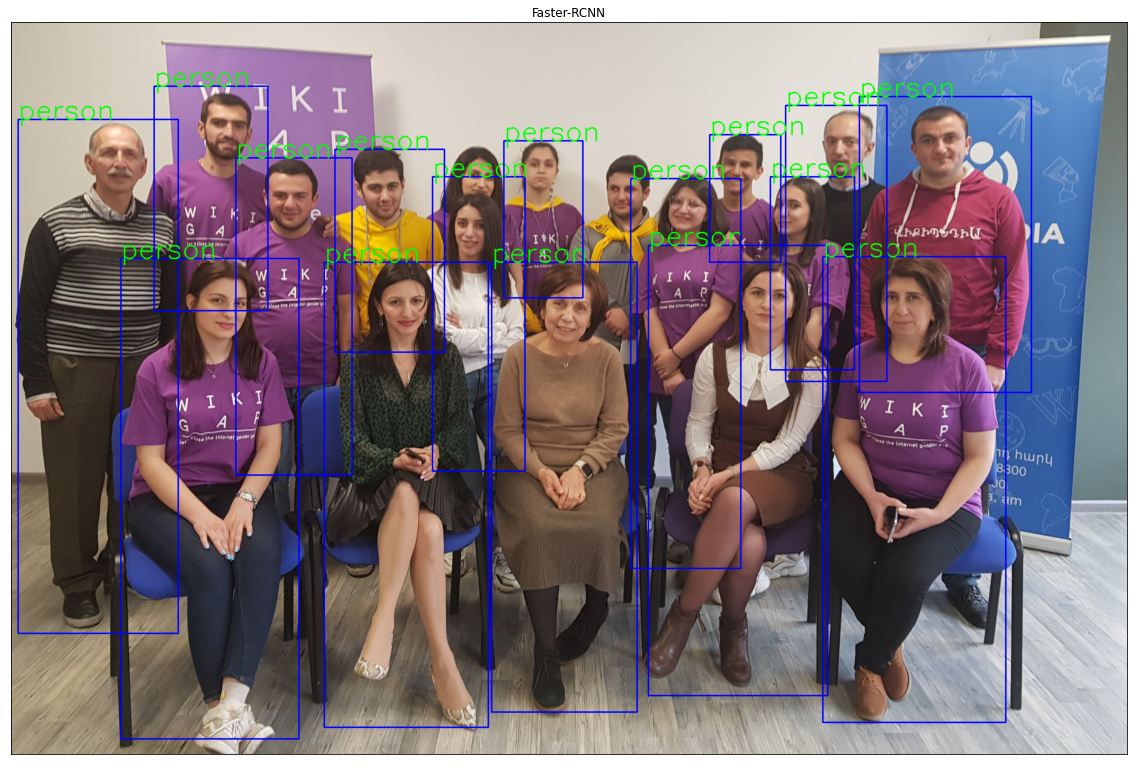

In [5]:
#!wget https://upload.wikimedia.org/wikipedia/commons/5/5d/401_Gridlock.jpg -O cars.jpg
#!wget "https://upload.wikimedia.org/wikipedia/commons/5/59/Lavish_cars_in_Porto%2C_Corsica_%288132798628%29.jpg" -O cars.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/e/ea/WikiGap_2020_in_Yerevan_%281%29.jpg -O people.jpg
# use the api pipeline for object detection
object_detection_api('./people.jpg', threshold=0.8)


--2022-12-01 13:39:21--  https://upload.wikimedia.org/wikipedia/commons/5/5d/401_Gridlock.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 324724 (317K) [image/jpeg]
Saving to: ‘cars.jpg’

cars.jpg            100%[===================>] 317.11K  --.-KB/s    in 0.02s   

2022-12-01 13:39:21 (17.7 MB/s) - ‘cars.jpg’ saved [324724/324724]



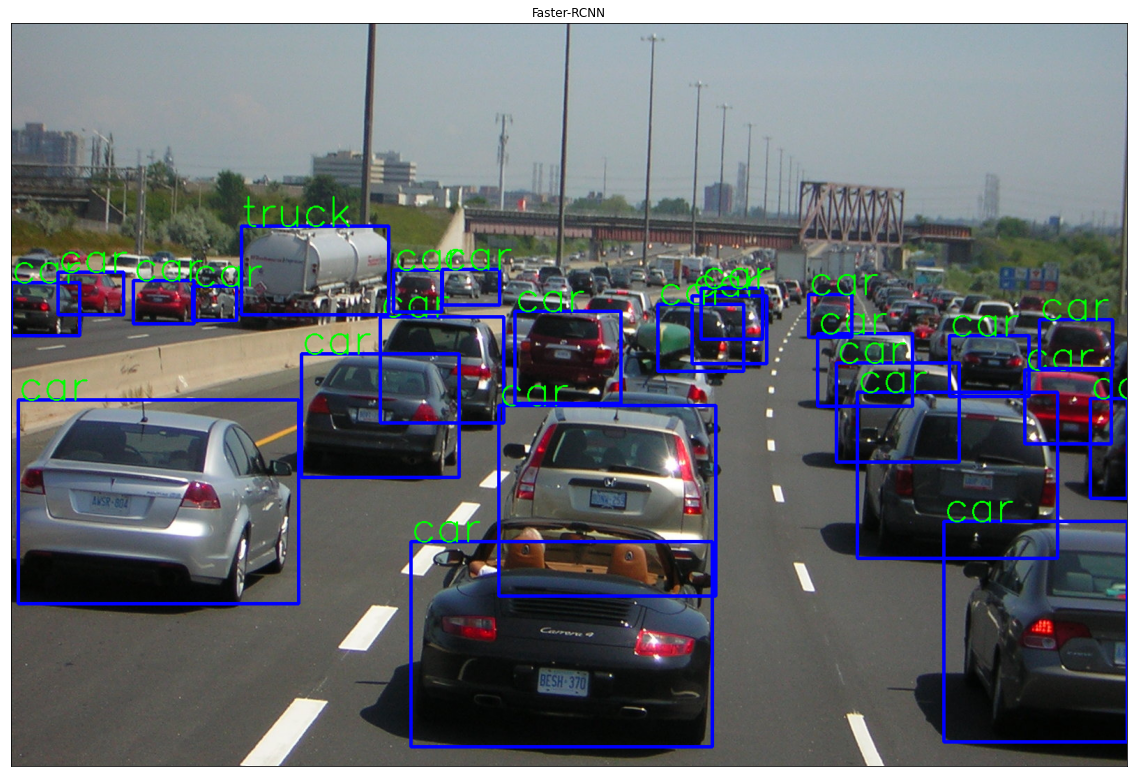

In [7]:
!wget https://upload.wikimedia.org/wikipedia/commons/5/5d/401_Gridlock.jpg -O cars.jpg

object_detection_api('./cars.jpg', rect_th=4, text_th=2, text_size=2)

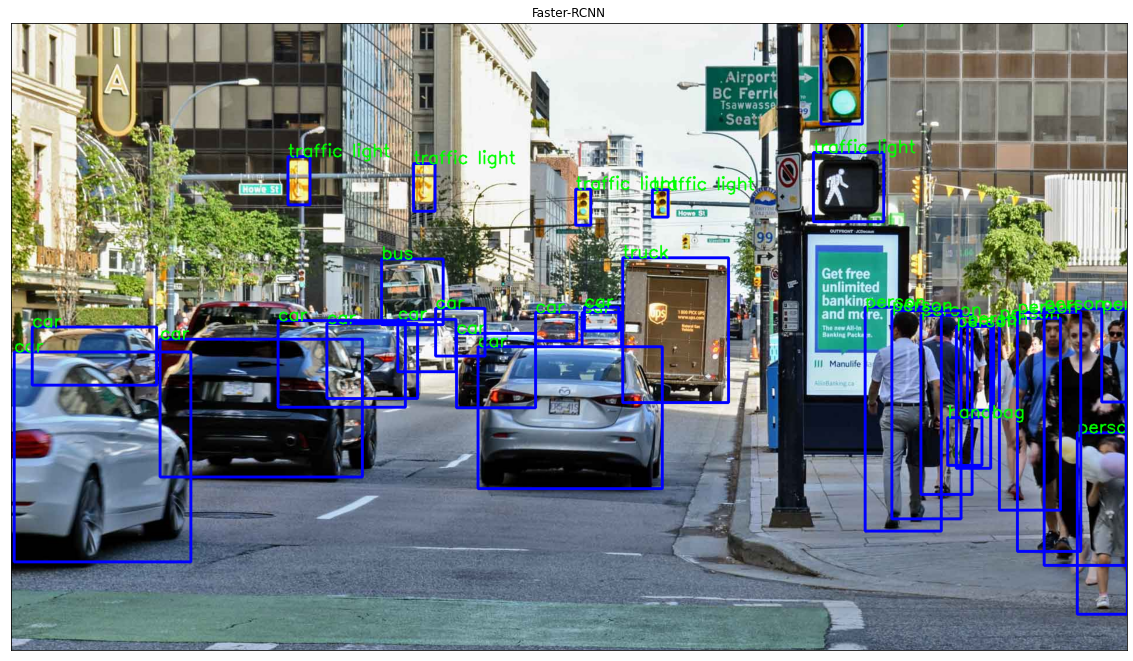

In [11]:

object_detection_api('./street.jpg', rect_th=3, text_th=2, text_size=1)

## **Conclusion**

- I carried out Faster R-CNN Object Detection with PyTorch using fasterrcnn_mobilenet_v3_large_fpn pretrained model. 
- You can see how fasterrcnn_mobilenet_v3_large_fpn to capture the continuity and detect objects. 
-You can play around with a few more images to see how the pretrained models perform in different scenarios.

## **References**
- [Faster R-CNN Models](https://github.com/pytorch/vision/tree/main/torchvision/models)
